This example show how to use py2gcode to generate gcode for create lines from an svg file, with special focus in the generation of gcode for fusing lines used in inflatables fabric actuators. 

So the workflow in this notebooks works as follows:

1. Load the svg file
2. Explore the files, and find the curves.
3. Translate this vector description to coordinates.
4. Use py2gcode to create our custom made gcode. 


In [68]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np
import re

from svgpathtools import svg2paths2, Path, Line, QuadraticBezier, CubicBezier, Arc
from py2gcode import py2gcode

#%%
paths, attributes,svg_attributes  = svg2paths2('data/elements.svg')

We get 2 list, paths and atributes (they should have the same amount of elements), and a dictionary svg_atributes. In the next block we inplement a function to sample points along the curves with a given resolution. 

In [69]:
def tranverse_path(path,attribute,res = 0.4):
    """
    Transverse a given path for a given resolution
    
    Parameters
    ----------
    path : path to transverse
    attribute : dict with atributes (looking for transformations)
    res : step between points to resolve arcs or splines. The default is 0.8.

    Returns
    -------
    points : points in the path transvered

    """
    points = []
    z0 = 0 # translation stored in atributes
    if 'transform' in attribute:
        if 'translate' in attribute['transform']:
            values = re.findall(r"[-+]?(?:\d*\.*\d+)", attribute['transform'])
            z0 = complex(float(values[0]),float(values[1]))
    for seg in path._segments:
        if isinstance(seg,Line):
            points.append(seg.start+z0)
            points.append(seg.end+z0)
        else:
            n = round(seg.length(0,1)/res)
            if n != 0:
                ds = seg.length(0,1)/n
                for i in range(n):
                    t = seg.ilength(ds*i)
                    points.append(seg.point(t)+z0)
                points.append(seg.point(1)+z0)
    return np.array(points)

(-4.172806620814801, 90.5439280371108, -1.8054571500000003, 37.914600150000005)

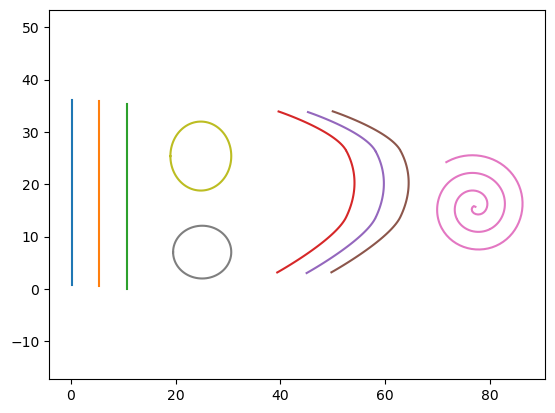

In [70]:
# use the function tranverse paths for all elements.
for path,attribute in zip(paths,attributes):
    points = tranverse_path(path,attribute)
    plt.plot(np.real(points),np.imag(points))
plt.axis('equal')